<a href="https://colab.research.google.com/github/ShahinGanbar/Hyperparameter_tuning/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the requirements.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Loading iris data and performing Grid Search and Cross Validation


In [5]:
data = load_iris()

X = data.data
y = data.target

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

rf_model = RandomForestClassifier()

# Adjusting parameter grid
param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [10,20,30],
    'min_samples_split' : [2,5,10]
}

# Performing Grid Search on all data
grid_search = GridSearchCV(rf_model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

# Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
# Best Cross-validation Accuracy: 0.9666666666666668
# Best Estimator: RandomForestClassifier(max_depth=10)



Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.9666666666666668
Best Estimator: RandomForestClassifier(max_depth=10, n_estimators=50)


Displaying metric results correspond to Cross Validation method


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score


rf_best = grid_search.best_estimator_

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_best, X, y, cv=5, scoring=scoring)


print("Cross-validation Accuracy:", cv_results['test_accuracy'].mean())
print("Cross-validation Precision (Macro):", cv_results['test_precision_macro'].mean())
print("Cross-validation Recall (Macro):", cv_results['test_recall_macro'].mean())
print("Cross-validation F1 Score (Macro):", cv_results['test_f1_macro'].mean())


Cross-validation Accuracy: 0.9666666666666668
Cross-validation Precision (Macro): 0.9707070707070707
Cross-validation Recall (Macro): 0.9666666666666668
Cross-validation F1 Score (Macro): 0.9664818612187034


In [16]:

y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)
#recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



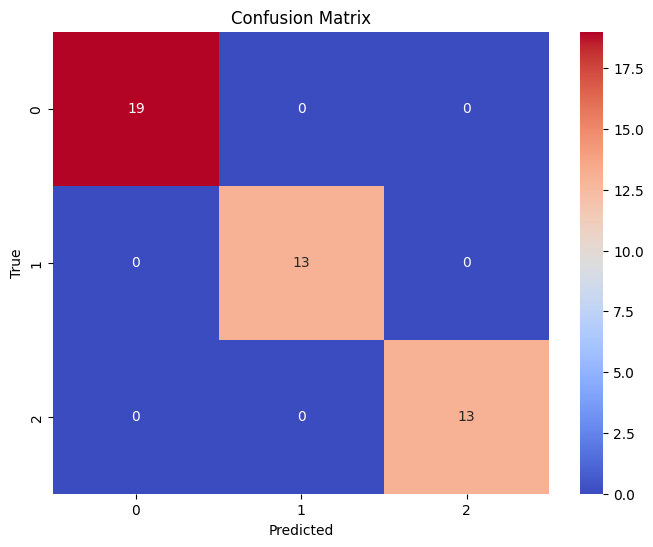

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='coolwarm')
import seaborn as sns
import matplotlib.pyplot as plt


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
